# Лабораторная работа № 3. Титаник

На основе данных конкурса [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) постройте модель логистической регресси для предсказания выживших пассажиров.

## Задание

1. Постройте классификатор используя доступные числовые признаки.
2. Оцените точность и полноту классификации. Постройте график ROC кривой.
3. Расширьте пространство признаков на основе имени пассажира и оцените качество новой модели.

#  _Начало работы_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
train[train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [6]:
train[train['Sex'].str.match("male")].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

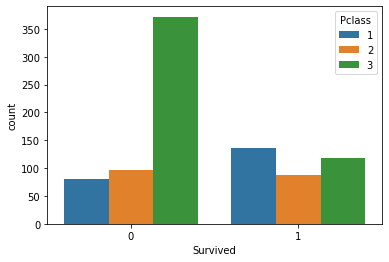

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

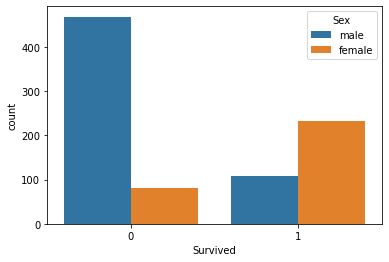

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

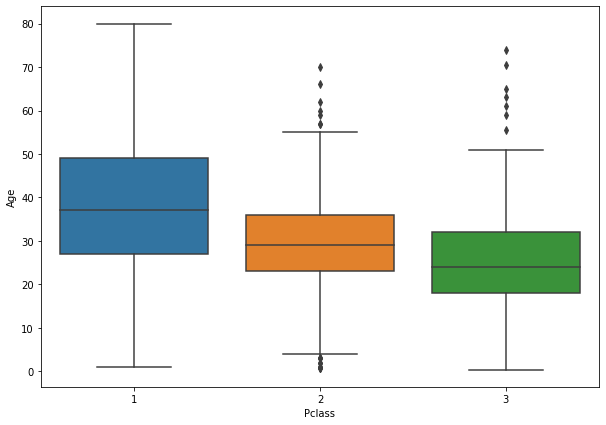

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

## Nan => 0 (Age)

In [10]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [11]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)

# для кабины много пропусков

In [12]:
train.drop("Cabin",inplace=True,axis=1)

In [13]:
train.dropna(inplace=True)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


### один столбец указывает значение другого столбца. Например, если мужчина равен 1, то женщина будет равна 0 и наоборот.

In [21]:
sex = pd.get_dummies(train["Sex"],drop_first=True)
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
Pclass = pd.get_dummies(train["Pclass"],drop_first=True)

### добавление в набор данных

In [22]:
train = pd.concat([train,Pclass,sex,embarked],axis=1)

### Удаление лишней информации

In [24]:
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

## У- целевая переменная для ВЫЖИВАНИЯ

In [26]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

 _Выборка:_ 70% обучения, 30% тест

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

_Обучаем Логисточескую регрессию_

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Dima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
X_train

,Age,SibSp,Parch,Fare,2,3,male,Q,S
807,18.0,0,0,7.7750,0,1,0,0,1
651,18.0,0,1,23.0000,1,0,0,0,1
2,26.0,0,0,7.9250,0,1,0,0,1
690,31.0,1,0,57.0000,0,0,1,0,1
196,25.0,0,0,7.7500,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
576,34.0,0,0,13.0000,1,0,0,0,1
840,20.0,0,0,7.9250,0,1,1,0,1
338,45.0,0,0,8.0500,0,1,1,0,1
524,25.0,0,0,7.2292,0,1,1,0,0


In [42]:
X_test

,Age,SibSp,Parch,Fare,2,3,male,Q,S
511,25.0,0,0,8.05,0,1,1,0,1
613,25.0,0,0,7.75,0,1,1,1,0
615,24.0,1,2,65.00,1,0,0,0,1
337,41.0,0,0,134.50,0,0,0,0,0
718,25.0,0,0,15.50,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
792,25.0,8,2,69.55,0,1,0,0,1
828,25.0,0,0,7.75,0,1,1,1,0
732,29.0,0,0,0.00,1,0,1,0,1
669,38.0,1,0,52.00,0,0,0,0,1


## Точность модели

In [33]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)

- Истинный позитив: 150 (Мы прогнозировали положительный результат, и он был положительным)
- Истинный негатив: 71 (Мы прогнозировали отрицательный результат, и он оказался отрицательным)
- Ложноположительный результат: 13 (Мы прогнозировали положительный результат, но он оказался отрицательным)
- Ложноотрицательный результат: 33 (Мы прогнозировали отрицательный результат, и он оказался положительным)
- В этой матрице: 150+71=221 верных прогнозов; 33+13=46 ошибочных прогнозов

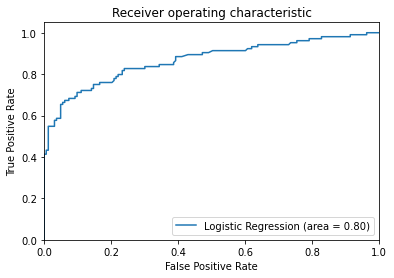

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()